In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
test = pd.read_csv(r"C:\Users\ethan\Downloads\StudentsPerformance.csv")

In [3]:
test.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


### Find out how many males and females are in the group.

In [4]:
test['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

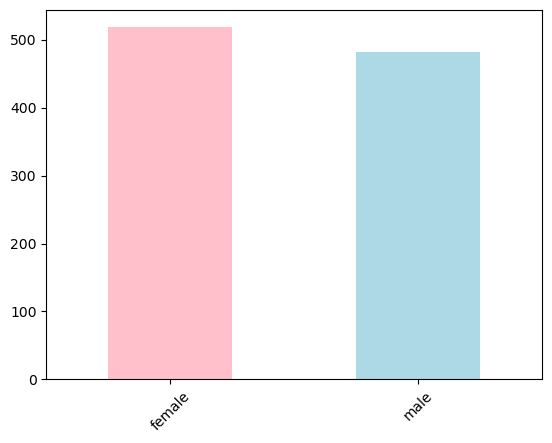

In [7]:
colors = ['pink','lightblue']
test['gender'].value_counts().plot(kind = 'bar', rot = 45, color = colors)
plt.show()

###  What do you think about the students' parental level of education?


In [8]:
test['parental level of education'].unique()

array(['some high school', 'high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"],
      dtype=object)

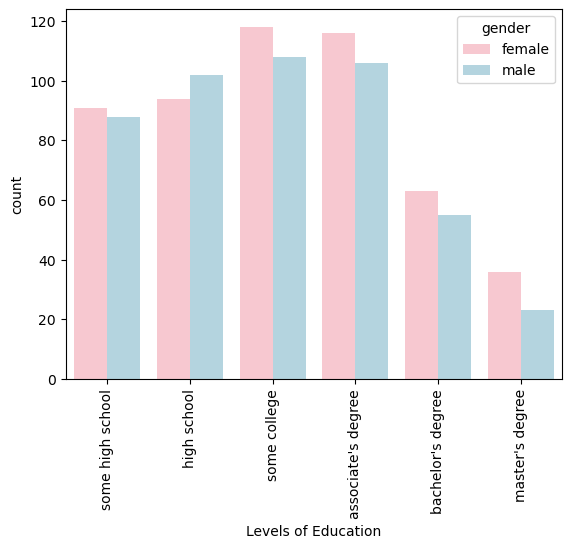

In [10]:
sns.countplot(x='parental level of education', hue='gender', data=test, palette=["pink", "lightblue"]).set_xlabel('Levels of Education')
plt.xticks(rotation = 90)
plt.show()

The number of males when compared to females who go through the next levels of edication is low. A very low number of males obtain a master's degree. 

### Who scores the most on average for math, reading and writing based on Gender and Test Preparation Course?

In [11]:
Total = test.select_dtypes(include = 'int').sum(axis  = 1)
test['Average'] = Total / 3

In [12]:
test.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
0,female,group C,some high school,free/reduced,none,0,17,10,9.000000
1,female,group B,high school,free/reduced,none,8,24,23,18.333333
2,female,group B,some high school,free/reduced,none,18,32,28,26.000000
3,female,group B,some college,standard,none,11,38,32,27.000000
4,female,group C,some college,free/reduced,none,22,39,33,31.333333


In [13]:
test['Average'].max()

100.0

#### Based on gender

In [14]:
test.loc[(test.Average == 100) & (test.gender == 'female')]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
516,female,group E,bachelor's degree,standard,none,100,100,100,100.0
517,female,group E,associate's degree,standard,none,100,100,100,100.0


#### Based on test preparation course

In [15]:
test.loc[(test.Average == 100) & (test['test preparation course'] == 'completed')]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
999,male,group E,bachelor's degree,standard,completed,100,100,100,100.0


### What do you think about the scoring variation for math, reading and writing based on Gender and Test Preparation Course?


#### Gender

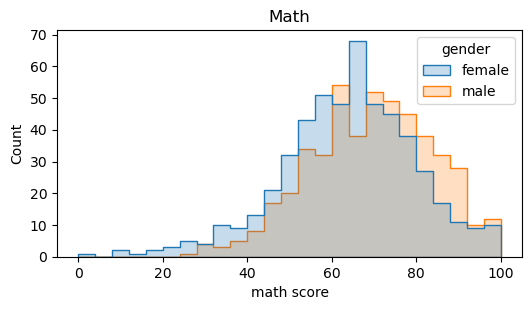

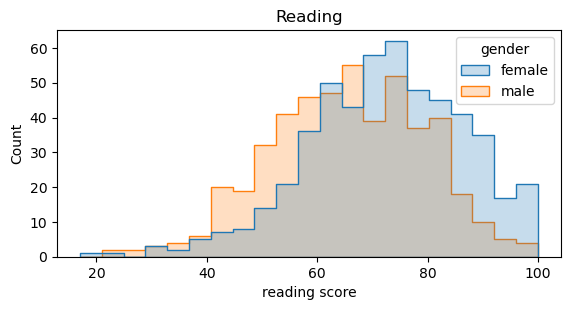

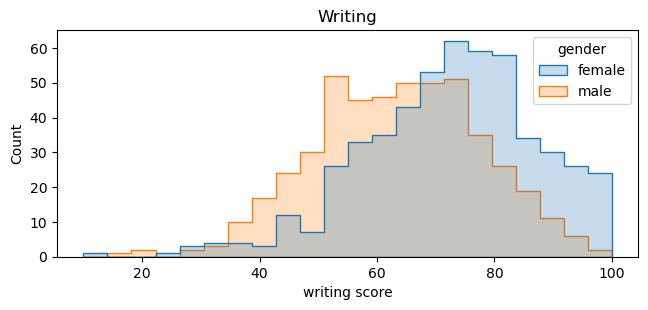

In [16]:
plt.figure(figsize=(6,10))
plt.subplot(3,1,1)
plt.title('Math')
x= test['gender']

sns.histplot(data = test, x= 'math score', hue = 'gender', element = 'step')

plt.figure(figsize=(6.5,10))
plt.subplot(3,1,2)
plt.title('Reading')
x= test['gender']

sns.histplot(data = test, x= 'reading score', hue = 'gender', element = 'step')

plt.figure(figsize=(7.5,10))
plt.subplot(3,1,3)
plt.title('Writing')
x= test['gender']

sns.histplot(data = test, x= 'writing score', hue = 'gender', element = 'step')

plt.show()

#### Test preparation course

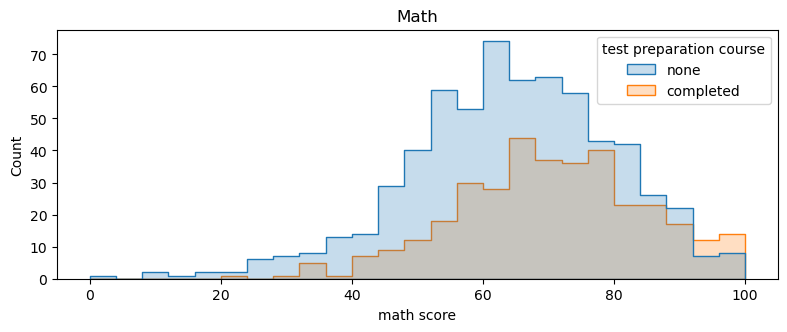

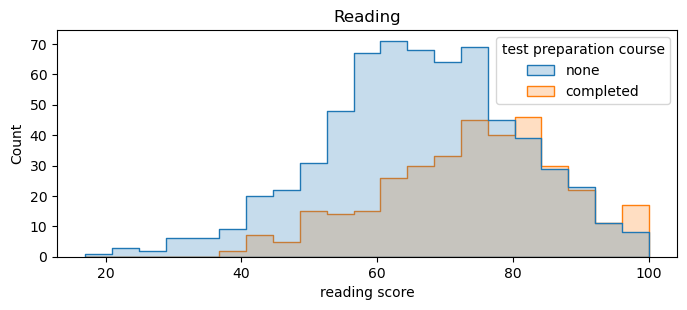

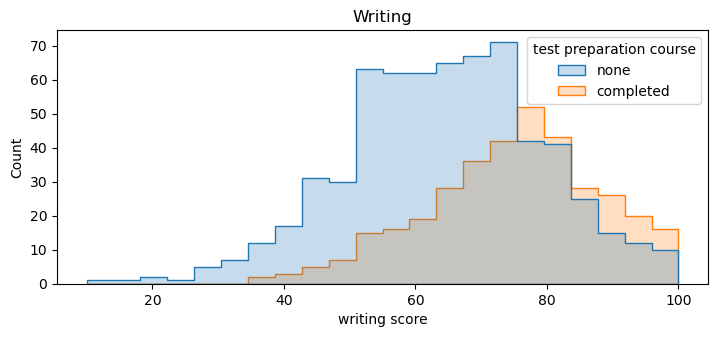

In [17]:
plt.figure(figsize=(9.3,11))
plt.subplot(3,1,1)
plt.title('Math')
x= test['gender']

sns.histplot(data = test, x= 'math score', hue = 'test preparation course', element = 'step')

plt.figure(figsize=(8,10))
plt.subplot(3,1,2)
plt.title('Reading')
x= test['gender']

sns.histplot(data = test, x= 'reading score', hue = 'test preparation course', element = 'step')

plt.figure(figsize=(8.4,11.2))
plt.subplot(3,1,3)
plt.title('Writing')
x= test['gender']

sns.histplot(data = test, x= 'writing score', hue = 'test preparation course', element = 'step')

plt.show()

Among those who completed and didn't, the latter has more number of students who scored full marks or above 80 in the case of reading and writing and above 95 in the case of math. The number of students who get a chance of attending a test preperation course is significantly low when compared to the other. 

### The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this.

In [18]:
test['math score'].max()

100

In [19]:
test.loc[test['math score'] >= 75, 'Bonus Eligibility'] = 'Eligible'
test.loc[test['math score'] < 75, 'Bonus Eligibility'] = 'Not Eligible'

In [20]:
test[test['Bonus Eligibility'] == 'Eligible']

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average,Bonus Eligibility
396,female,group A,high school,standard,completed,75,82,79,78.666667,Eligible
397,female,group B,bachelor's degree,free/reduced,none,75,85,82,80.666667,Eligible
398,female,group B,bachelor's degree,standard,none,75,84,80,79.666667,Eligible
399,female,group C,some college,standard,completed,75,81,84,80.000000,Eligible
400,female,group C,high school,standard,none,75,88,85,82.666667,Eligible
...,...,...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81,89.000000,Eligible
996,male,group A,some college,standard,completed,100,96,86,94.000000,Eligible
997,male,group D,some college,standard,completed,100,97,99,98.666667,Eligible
998,male,group E,associate's degree,free/reduced,completed,100,100,93,97.666667,Eligible


In [21]:
test[test['Bonus Eligibility'] == 'Not Eligible']

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average,Bonus Eligibility
0,female,group C,some high school,free/reduced,none,0,17,10,9.000000,Not Eligible
1,female,group B,high school,free/reduced,none,8,24,23,18.333333,Not Eligible
2,female,group B,some high school,free/reduced,none,18,32,28,26.000000,Not Eligible
3,female,group B,some college,standard,none,11,38,32,27.000000,Not Eligible
4,female,group C,some college,free/reduced,none,22,39,33,31.333333,Not Eligible
...,...,...,...,...,...,...,...,...,...,...
820,male,group D,bachelor's degree,free/reduced,completed,74,79,75,76.000000,Not Eligible
821,male,group D,some high school,standard,completed,74,71,78,74.333333,Not Eligible
822,male,group D,some high school,standard,none,74,74,72,73.333333,Not Eligible
823,male,group D,high school,free/reduced,none,74,70,69,71.000000,Not Eligible
